In [1]:
import math
import matplotlib.pyplot as plt
import mujoco_toolbox as mjtb

In [2]:
mjtb.CAPTURE_PARAMETERS = "all"
mjtb.PROGRESS_BAR = True

In [3]:
Vnom = 6
G = 55.5
t_stall = 15 / 100 / G
i_stall = 0.6
R = Vnom / i_stall

kt = t_stall / i_stall
ke = kt

V_control = 5

b_fit = 1.404e-6
kp_fit = 8.896

In [4]:
def legController(model, data) -> None:
    # Current state
    w = data.qvel[1]  # Current velocity of joint 1
    actual = data.qpos[1]  # Current position of joint 1

    desired = math.pi if data.time > 1 else 0

    error = desired - actual

    V = kp_fit * error

    V = max(min(V, V_control), -V_control)

    torque = (kt * (V - (ke * w * G)) / R - b_fit * w * G) * G

    data.ctrl[0] = torque  # control first joint

In [5]:
IC = {"qpos": [0, 0, 0]}

model = mjtb.Wrapper(xml="../tests/models/box_and_leg.xml",
                     duration=5,
                     fps=30,
                     initial_conditions=IC,
                     controller=legController,
                    ).run(render=True)

In [6]:
model

Wrapper(
  Duration: 5s [fps=30, ts=1e-04]
  Gravity: [ 0.    0.   -9.81],
  Resolution: 400W x 300H
  Bodies (5): world, body_1, leg_1, leg_2, floor
  Joints (3): prismatic_1, joint_1, joint_2
  Actuators (1): motor_1
  Controller: legController
)

In [7]:
len(model.frames)

151

In [8]:
model._captured_data

_SimulationData(500 Step(s) Captured)

""

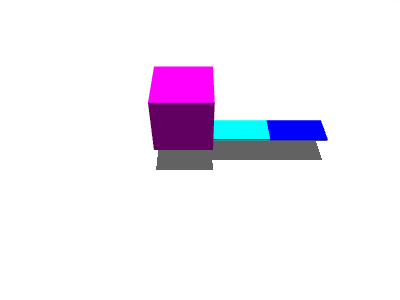

In [9]:
model.show()

""

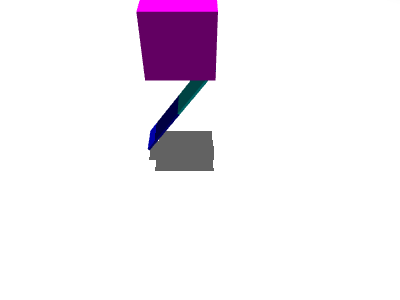

In [10]:
model.show(time_idx=1.2)

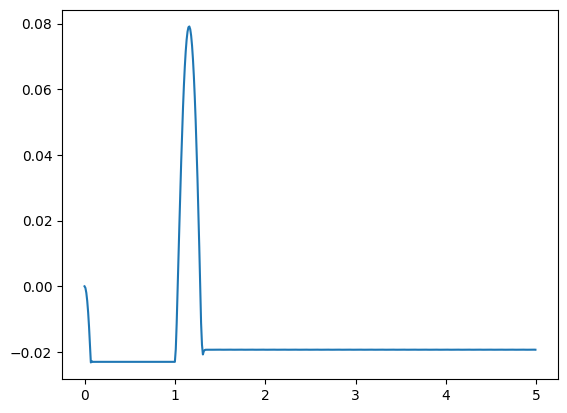

In [11]:
plt.plot(model.captured_data["time"], model.captured_data["qpos"][:, 0])
plt.show()

In [12]:
model._captured_data.shape

{'B_colind': (500, 12),
 'B_rowadr': (500, 5),
 'B_rownnz': (500, 5),
 'C_colind': (500, 6),
 'C_rowadr': (500, 3),
 'C_rownnz': (500, 3),
 'D_colind': (500, 9),
 'D_diag': (500, 3),
 'D_rowadr': (500, 3),
 'D_rownnz': (500, 3),
 'act': (500, 0),
 'act_dot': (500, 0),
 'actuator_force': (500, 1),
 'actuator_length': (500, 1),
 'actuator_moment': (500, 1),
 'actuator_velocity': (500, 1),
 'bvh_aabb_dyn': (500, 0, 6),
 'bvh_active': (500, 4),
 'cacc': (500, 5, 6),
 'cam_xmat': (500, 0, 9),
 'cam_xpos': (500, 0, 3),
 'cdof': (500, 3, 6),
 'cdof_dot': (500, 3, 6),
 'cfrc_ext': (500, 5, 6),
 'cfrc_int': (500, 5, 6),
 'cinert': (500, 5, 10),
 'contact': (500,),
 'crb': (500, 5, 10),
 'ctrl': (500, 1),
 'cvel': (500, 5, 6),
 'dof_island': (500, 3),
 'dof_islandind': (500, 3),
 'efc_AR': (500, 0),
 'efc_AR_colind': (500, 0),
 'efc_AR_rowadr': (500, 0),
 'efc_AR_rownnz': (500, 0),
 'efc_D': (500, 0),
 'efc_J': (500, 0),
 'efc_JT': (500, 0),
 'efc_JT_colind': (500, 0),
 'efc_JT_rowadr': (500, 3)